In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = datasets.fetch_openml('mnist_784')
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = data['data'], data['target'].astype(int)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (56000, 784)
Testing data shape: (14000, 784)
Training labels shape: (56000,)
Testing labels shape: (14000,)


In [7]:
def plot_samples(X, y, num_samples=10):

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))

    for i in range(num_samples):

        if isinstance(X, pd.DataFrame): image = X.iloc[i].values
        else: image = X[i]

        if isinstance(y, pd.Series): label = y.iloc[i]
        else: label = y[i]

        axes[i].imshow(image.reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')

    plt.show()

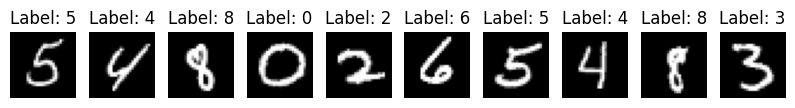

In [8]:
plot_samples(X_train, y_train)

##### Normalizing.

In [9]:
X_train /= 255
X_test /= 255

In [10]:
X_train_small = X_train.iloc[:10_000]
y_train_small = y_train.iloc[:10_000]
X_test_small = X_test.iloc[:2_000]
y_test_small = y_test.iloc[:2_000]

#### Linear SVM 

In [11]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='linear', C=1))])

In [12]:
pipe_1.fit(X_train_small, y_train_small)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=1, kernel='linear'))])

In [13]:
acc = cross_val_score(pipe_1, X_train_small, y_train_small, cv=2)

print("Linear SVM Training Accuracy: {:.2f} %".format(acc.mean() * 100))

Linear SVM Training Accuracy: 90.55 %


In [14]:
y_pred_train = pipe_1.predict(X_test_small)

cm = confusion_matrix(y_test_small, y_pred_train)

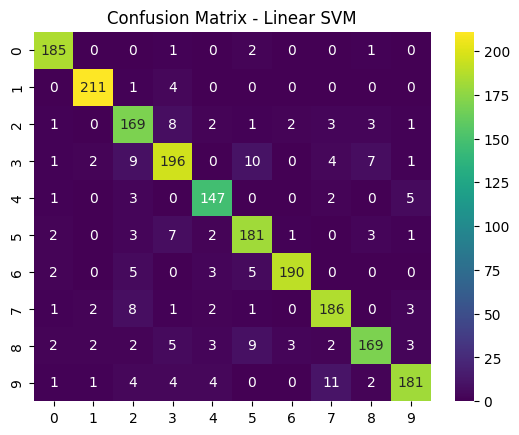

In [15]:
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

In [16]:
print(classification_report(y_test_small, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       189
           1       0.97      0.98      0.97       216
           2       0.83      0.89      0.86       190
           3       0.87      0.85      0.86       230
           4       0.90      0.93      0.92       158
           5       0.87      0.91      0.89       200
           6       0.97      0.93      0.95       205
           7       0.89      0.91      0.90       204
           8       0.91      0.84      0.88       200
           9       0.93      0.87      0.90       208

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



#### Nonlinear SVM 

In [17]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='rbf', gamma=0.01, C=20))])

In [18]:
pipe_2.fit(X_train_small, y_train_small)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=20, gamma=0.01))])

In [19]:
acc = cross_val_score(pipe_2, X_train_small, y_train_small, cv=2)

print("Nonlinear SVM Training Accuracy: {:.2f} %".format(acc.mean() * 100))

Nonlinear SVM Training Accuracy: 95.26 %


In [20]:
y_pred_train_rbf = pipe_2.predict(X_test_small)

cm_rbf = confusion_matrix(y_test_small, y_pred_train_rbf)

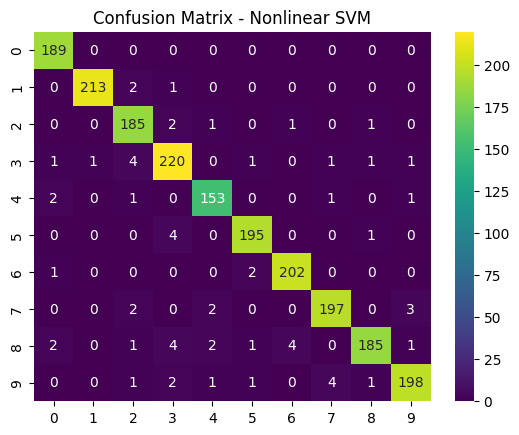

In [21]:
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - Nonlinear SVM')
plt.show()

In [22]:
print(classification_report(y_test_small, y_pred_train_rbf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       189
           1       1.00      0.99      0.99       216
           2       0.94      0.97      0.96       190
           3       0.94      0.96      0.95       230
           4       0.96      0.97      0.97       158
           5       0.97      0.97      0.97       200
           6       0.98      0.99      0.98       205
           7       0.97      0.97      0.97       204
           8       0.98      0.93      0.95       200
           9       0.97      0.95      0.96       208

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [23]:
param_grid = {'classifier__C': [0.1, 1, 10, 20, 25, 30],
              'classifier__gamma': [0.005, 0.01, 0.1, 1]}

In [24]:
grid_search = GridSearchCV(pipe_2, param_grid, cv=2, verbose=1)

grid_search.fit(X_train_small, y_train_small)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', SVC(C=20, gamma=0.01))]),
             param_grid={'classifier__C': [0.1, 1, 10, 20, 25, 30],
                         'classifier__gamma': [0.005, 0.01, 0.1, 1]},
             verbose=1)

In [25]:
print(f"Best parameters from grid search: {grid_search.best_params_}")

Best parameters from grid search: {'classifier__C': 20, 'classifier__gamma': 0.01}
